# PROBLEM 0

We want to create a script that generates random data from different distributions.
In particular, we want Gaussians distributions (with different mean and variance), a uniformly random distribution and a beta distribution.

We start importing all the libraries we'll need (via 'import library_name as library_handle' to keep our lives easier):
(they are previously installed in the python environment used via 'pip install library_name', with the desired environment activated)

In [194]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
#check if the libraries are correctly imported
print(f"Numpy's version: {np.__version__}")
print(f"Matplot's version: {mpl.__version__}")
print(f"Scipy's version: {sp.__version__}")
print(f"Pandas's version: {pd.__version__}")

Numpy's version: 2.3.5
Matplot's version: 3.10.7
Scipy's version: 1.16.3
Pandas's version: 2.3.3


Before generation the asked data, we're going to make some plots of the real distributions to understand them. Then we'll generate the random data that follows that distributions.

Let's start with the GAUSSIAN DISTRIBUTION
$$f(x)=\frac{e^{-x^2/2}}{\sqrt{2\pi}}$$
We'll generate a Gaussian or normal distribution for different values of the variance, $\sigma$, and mean, $\mu$.
Notice that we are really only interested in the Probability Density Function (PDF).

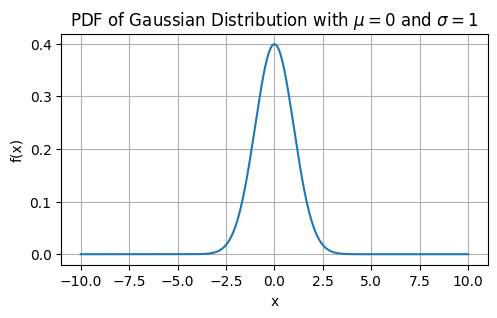

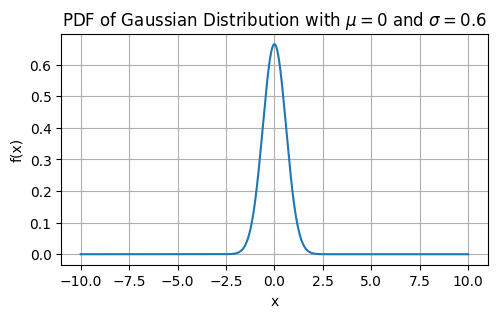

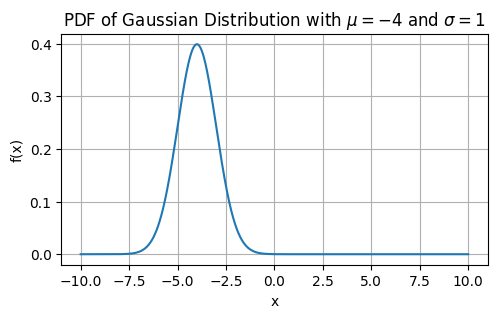

In [195]:
# we can define a Python function. Thanks to this definition, we can simply call it afterwards without needing to re-code it every time we want to change some parameters (variance and mean in this exemple).
def plot_gaussian_pdf(mu, sigma):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = (1 / np.sqrt(2 * np.pi * sigma ** 2)) * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2)) # We define our Probability Density Function (PDF) and we compute its value in each of our x points. Check https://en.wikipedia.org/wiki/Normal_distribution or any statistics book for the equations being used
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF of Gaussian Distribution with $\\mu={mu}$ and $\\sigma={sigma}$') # Set a title for the whole plot

# mean = 0, std = 1
plot_gaussian_pdf(mu=0, sigma=1)
# mean = 0, std = 0.6
plot_gaussian_pdf(mu=0, sigma=0.6)
# mean = -4, std = 1
plot_gaussian_pdf(mu=-4, sigma=1)    

Now, the UNIFORMLY DISTRIBUTION (also called rectangular distribution)
$$\begin{align*}
    f(x) &= 
    \begin{cases}
    \displaystyle \frac{1}{b-a}, & \text{for } a \le x \le b\\\\[6pt]
    0, & \text{for } x<a \text{ or } x>b
    \end{cases}
    \end{align*}$$

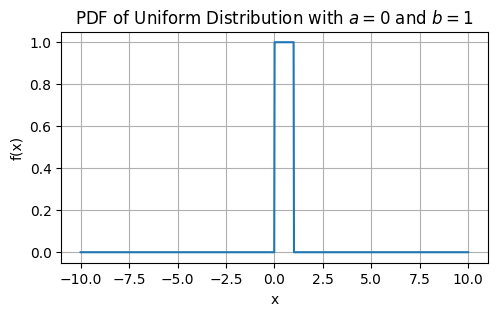

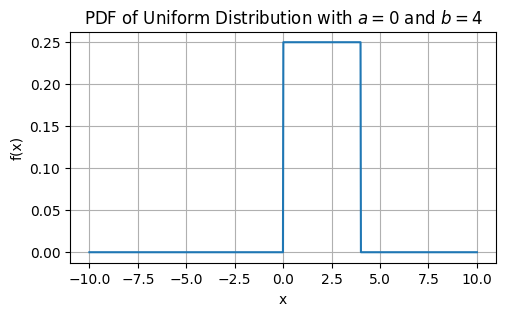

In [196]:
def plot_uniform_pdf(a, b):
    x = np.linspace(-10, 10, 1000) # Generate a vector from -10 to 10 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.uniform.pdf(x, loc=a, scale=b) # Uniform PDF
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF of Uniform Distribution with $a={a}$ and $b={b}$') # Set a title for the whole plot

# a = 0, b = 1
plot_uniform_pdf(a=0, b=1)
# a = -2, b = 4
plot_uniform_pdf(a=0, b=4)

Lately, the BETA DISTRIBUTION
$$f(x,\alpha,\beta)=\frac{\Gamma(\alpha+\beta)x^{\alpha-1}(1-x)^{\beta-1}}{\Gamma(\alpha)\Gamma(\beta)}$$

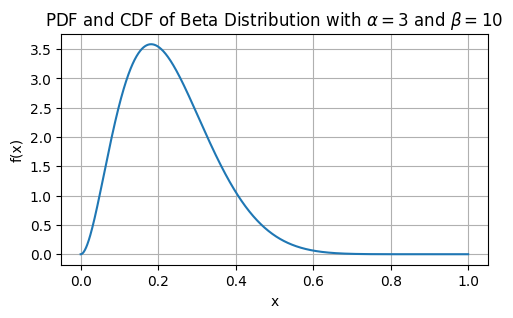

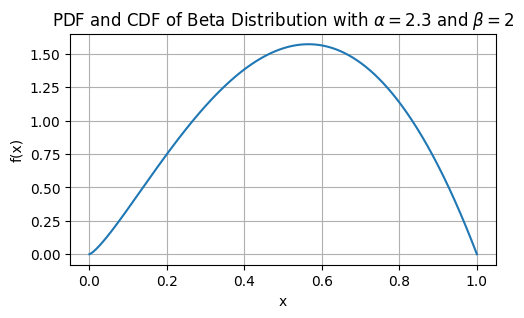

In [197]:
#Notice that a,b > 0.
def plot_beta_pdf(a, b):
    x = np.linspace(0, 1, 1000) # Generate a vector from -1 to 1 with 1000 points and save it in the "x" variable
    x_pdf = sp.stats.beta.pdf(x, a, b) # Beta PDF
    fig = plt.figure(figsize=(5.5,3)) # Generate an empty plot with the dimensions specified: (width, height) in inches
    ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
    ax.plot(x, x_pdf, label='PDF') # Plot the PDF and assign it a label
    ax.grid() # Plot a grid
    ax.set_xlabel('x') # Add the x axis label
    ax.set_ylabel('f(x)') # Add the y axis label
    ax.set_title(f'PDF and CDF of Beta Distribution with $\\alpha={a}$ and $\\beta={b}$') # Set a title for the whole plot

# alpha = 3, beta = 10
plot_beta_pdf(a=3, b=10)
# alpha = 2.3, beta = 2
plot_beta_pdf(a=2.3, b=2)

Finally, let's GENERATE RANDOM DATA from the different distributions discussed previously and compare them.

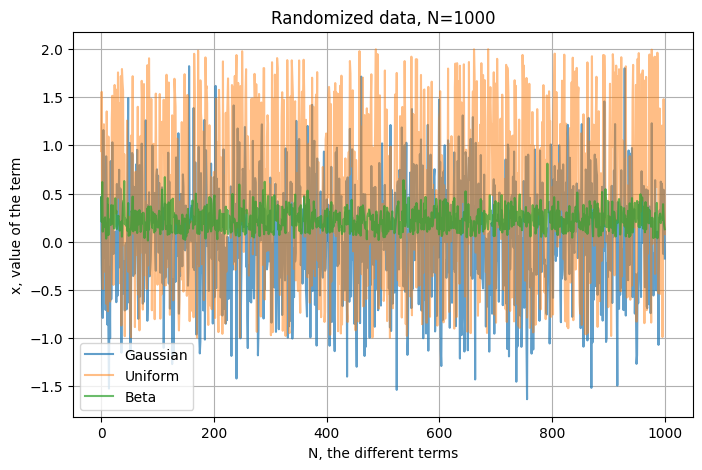

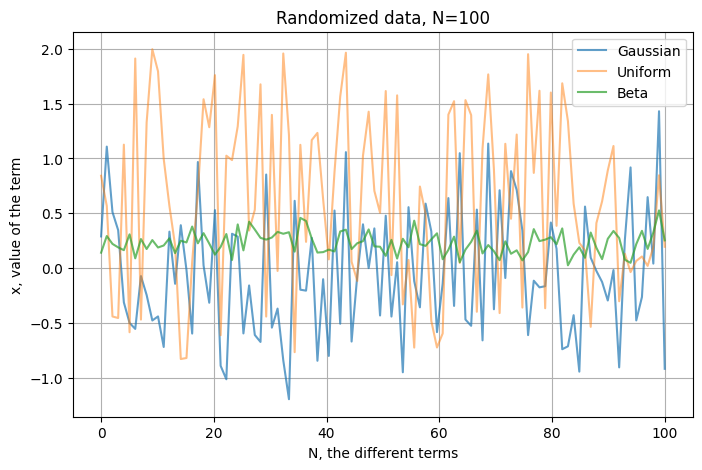

In [198]:
# We are going to generate three different sets of random data, each one following a different distribution: Gaussian (with mean 0 and variance 0.6), Uniform (with a=-1, b=2) and Beta (with alpha=3, beta=10).
# Of each of them we will do two versions, one with 1000 elements (named '1') and another one with 100 elements ('2'). Doing so, we will be able to see the effect of the number of samples in the results obtained afterwards.

y_normal1 = np.random.normal(0,0.6,1000)
y_normal2 = np.random.normal(0,0.6,100)

y_uniform1 = np.random.uniform(-1,2,1000)
y_uniform2 = np.random.uniform(-1,2,100)

y_beta1 = np.random.beta(3,10,1000)
y_beta2 = np.random.beta(3,10,100)

x1 = np.linspace(0,1000,1000)
x2 = np.linspace(0,100,100)

fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(x1, y_normal1, label='Gaussian', alpha=0.7) # Plot the PDF and assign it a label
ax.plot(x1, y_uniform1, label='Uniform', alpha=0.5) # alpha is used to set the transparency of the plot
ax.plot(x1, y_beta1, label='Beta', alpha=0.7)
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('N, the different terms') # Add the x axis label
ax.set_ylabel('x, value of the term') # Add the y axis label
ax.set_title('Randomized data, N=1000'); # Set a title for the whole plot

fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(x2, y_normal2, label='Gaussian', alpha=0.7) # Plot the PDF and assign it a label
ax.plot(x2, y_uniform2, label='Uniform', alpha=0.5) # alpha is used to set the transparency of the plot
ax.plot(x2, y_beta2, label='Beta', alpha=0.7)
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel('N, the different terms') # Add the x axis label
ax.set_ylabel('x, value of the term') # Add the y axis label
ax.set_title('Randomized data, N=100'); # Set a title for the whole plot

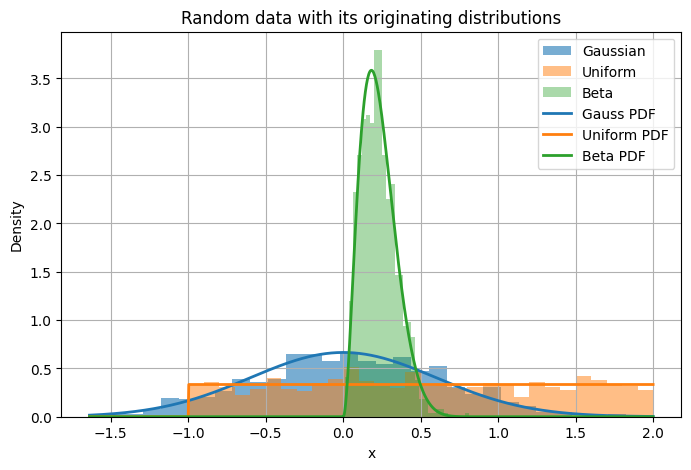

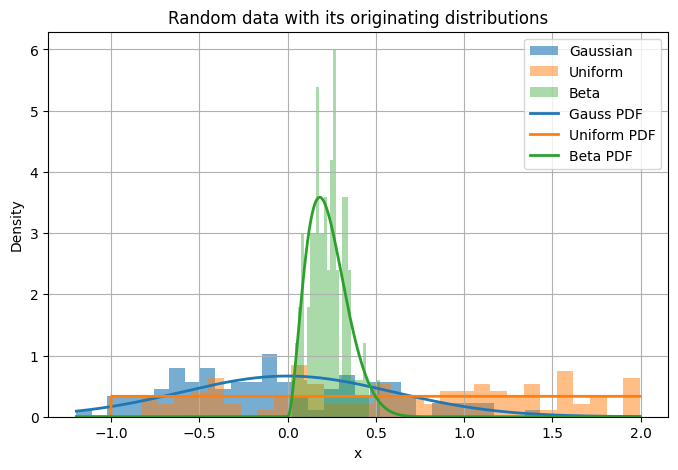

In [199]:
# Let's now plot the histograms of the different random data generated previously along with their corresponding Probability Density Functions (PDFs) to compare them and to see if the data sets follow the general form as expected from each distribution.

def plot_data_dist_comp(y_normal, y_uniform, y_beta, mu=0, sigma=1, a=0, b=1, c=2, d=4):
    fig, ax = plt.subplots(figsize=(8,5))

    ax.hist(y_normal, bins=30, density=True, alpha=0.6, label='Gaussian')
    ax.hist(y_uniform, bins=30, density=True, alpha=0.5, label='Uniform')
    ax.hist(y_beta, bins=30, density=True, alpha=0.4, label='Beta')

    xmin = min(np.min(y_normal), np.min(y_uniform), np.min(y_beta))
    xmax = max(np.max(y_normal), np.max(y_uniform), np.max(y_beta))
    x = np.linspace(xmin, xmax, 1000)

    x_pdf_G = sp.stats.norm.pdf(x, loc=mu, scale=sigma)
    x_pdf_U = sp.stats.uniform.pdf(x, loc=a, scale=b-a)
    x_pdf_B = sp.stats.beta.pdf(x, c, d)

    ax.plot(x, x_pdf_G, color='C0', lw=2, label='Gauss PDF')
    ax.plot(x, x_pdf_U, color='C1', lw=2, label='Uniform PDF')
    ax.plot(x, x_pdf_B, color='C2', lw=2, label='Beta PDF')

    ax.grid(True)
    ax.legend()
    ax.set_xlabel('x')
    ax.set_ylabel('Density')
    ax.set_title("Random data with its originating distributions")
    plt.show()

plot_data_dist_comp(y_normal1, y_uniform1, y_beta1, mu=0, sigma=0.6, a=-1, b=2, c=3, d=10)
plot_data_dist_comp(y_normal2, y_uniform2, y_beta2, mu=0, sigma=0.6, a=-1, b=2, c=3, d=10)

We can see how our randomized data follows pretty well the distributions of which it's based. 
Also, for future comments it's important to remark how it gets better with the size of the sample. In the Beta distribution it's the case where is more clear: when we increase the number of points generated, as they follow the probability function of the distribution, it becomes more similiar to the exact pdf.

# PROBLEM 1

Now that we have already the random data generated with the three different distributions, we're ready to study the concentration inequalities.

In fact, the problem we're asked to solve is to have a criteria to say if taking the average of the random data generated as the mean of the underlying / real distribution is a good approximation or not.

It's important to understand that by doing so we're somehow assuming that we are given the data (from an experiment for example) and that we do not know which distribution does it follow (so neither the real mean and variance).

To have a criteria we'll analize the confidence intervals (or error bars) via two different types of inequalities: Hoeffding and Chebysev. In some way we are going to compute the average and give an error bar to that number, having as a result an interval of which we can be sure that the mean of the real ideal distribution is inside with a certain confidence level.

In [200]:
# Now, we calculate the mean and standard deviation of each of the data sets generated previously. We'll use these values to compute the confidence intervals
# We also need to know the number of elements in each data set and for the Hoeffding inequality, the min and max of each data set.
# As it is going to be explainede, we're going to consider the bounds needed for the Hoeffding inequality as the min and max of each data set. In a real case scenario, if we know more about the distribution of the data, we could consider tighter bounds.
# But it's important to remark that the Hoeffding inequality requires known bounds, so we can't use infinite bounds as in the Gaussian distribution.
# Also, I'll use the same value of the parameter ab for the different values of N of each distribution, more concretely the one obtained with the biggest data set (N=1000). This is because in a real case scenario, we would have to know the bounds of the distribution previously to obtain any data, so they would be independent of the number of samples we take and it would be better to consider the widest bounds we know.
# We see how abN2, abU2 and abB2 are defined but is just to use de function defined and to avoid extra code, they are not used afterwards.

def variables_calc(y):
    m = np.mean(y)
    s = np.std(y)
    xmin= np.min(y)
    xmax= np.max(y)
    ab= xmax - xmin
    return (m,s,xmin,xmax,ab)

mN1, sN1, xminN1, xmaxN1, abN1 = variables_calc(y_normal1)
mN2, sN2, xminN2, xmaxN2, abN2 = variables_calc(y_normal2)
mU1, sU1, xminU1, xmaxU1, abU1 = variables_calc(y_uniform1)
mU2, sU2, xminU2, xmaxU2, abU2 = variables_calc(y_uniform2)
mB1, sB1, xminB1, xmaxB1, abB1 = variables_calc(y_beta1)    
mB2, sB2, xminB2, xmaxB2, abB2 = variables_calc(y_beta2)

N1=x1.size
N2=x2.size

So, let's start with the **HOEFFDING INEQUALITIES**

To do so, we have to assume that our data is formed by some random variables (independent) bounded in an interval (it can be different for each of them).
That bound could be given analizing the experiment used to obtain the data. For example, if we're measuring the energy of a system pumped by a laser which intensity can have small fluctuations with time, each measure is going to have different bounds. 
However, we do not have that type of information, we just have randomly generated some data following a distribution. So, we're going to assume that the bounds are the same for all the variables.

To get an estimation of that bounds, we're going to identify them as the maximum and minimum value of the data generated (in the case with a bigger number of elements).

Here's a more formal introduction to this inequality:

Let $X$ be a random variable, bounded by the intervals $a_i\leq X_i\leq b_i$. Let the empirical mean be $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$. Then, the Hoeffding's inequaility states that,
$$Pr(|\overline{X}-\mathbb{E}\left[\overline{X}\right]|\geq\epsilon)\leq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}$$
where $N$ is the number of measures that we have from $X$ and $\epsilon>0$.


**Why is this useful?** This inequality allows us to know with which confidence we can say that a given set of data follows a given probability distribution (specified by its theoretical mean, $\mathbb{E}\left[\overline{X}\right]$), knowing only the number of measures of $X$ we have and the upper and lower bounds of each individual measurement.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{1}{N}\sum_{i=1}^{N}X_i$, Hoeffding's inequality tells us that
$$\alpha\coloneqq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^{N}(a_i-b_i)^2}}\implies\epsilon=\sqrt{\ln(2/\alpha)\frac{\sum_{i=1}^{N}(a_i-b_i)^2}{2N^2}}=\sqrt{\frac{\ln(2/\alpha)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$
where $N$ is the size of the sample, $a_i$, $b_i$ the lower and upper bounds of each $X_i$, respectively, and $\alpha=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Once again, given that a confidence interval will take this general form in terms of the values of our variable of interest
$$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$
our specific confidence interval will be
$$\overline{X}-\sqrt{\frac{\ln(2/\alpha)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)\leq\mu\leq\overline{X}+\sqrt{\frac{\ln(2/\alpha)}{2}}\frac{1}{N}\sum_{i=1}^{N}(a_i-b_i)$$

In [201]:
def confidence_hoef(abN, abU, abB, mN, mU, mB, gamma): # we denote by gamma the level of confidence (1-gamma) instead of alpha to avoid confusion with the parameter of the beta distribution
    # Gaussian
    LciN = mN - np.sqrt(np.log(2/gamma)/2)*abN # Lower/left confidence interval Normal
    RciN = mN + np.sqrt(np.log(2/gamma)/2)*abN # Upper/right confidence interval Normal
    # Uniform
    LciU = mU - np.sqrt(np.log(2/gamma)/2)*abU # Lower/left confidence interval Uniform
    RciU = mU + np.sqrt(np.log(2/gamma)/2)*abU # Upper/right confidence interval Uniform
    # Beta
    LciB = mB - np.sqrt(np.log(2/gamma)/2)*abB # Lower/left confidence interval Beta
    RciB = mB + np.sqrt(np.log(2/gamma)/2)*abB # Upper/right confidence interval Beta
    return(LciN, RciN, LciU, RciU, LciB, RciB, gamma)


In [202]:
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN1, mU1, mB1, gamma=0.3173)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N1} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN2, mU2, mB2, gamma=0.3173)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N2} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN1, mU1, mB1, gamma=0.0455)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N1} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN2, mU2, mB2, gamma=0.0455)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N2} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN1, mU1, mB1, gamma=0.0027)
print(f'Considering a confidence level of {round(100*(1-gammac),4)}% and a data set of {N1} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_hoef(abN1, abU1, abB1, mN2, mU2, mB2, gamma=0.0027)
print(f'Considering a confidence level of {round(100*(1-gammac),4)}% and a data set of {N2} elements, the error bars of the mean given by Hoeffding\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')

Considering a confidence level of 68.27% and a data set of 1000 elements, the error bars of the mean given by Hoeffding's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -3.2913, Upper/right bound: 3.3486
    For the UNIFORM distribution : Lower/left bound: -2.3793, Upper/right bound: 3.3734
    For the BETA distribution    : Lower/left bound: -0.5372, Upper/right bound: 0.9953
Considering a confidence level of 68.27% and a data set of 100 elements, the error bars of the mean given by Hoeffding's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -3.3743, Upper/right bound: 3.2656
    For the UNIFORM distribution : Lower/left bound: -2.2498, Upper/right bound: 3.5029
    For the BETA distribution    : Lower/left bound: -0.5375, Upper/right bound: 0.995

Considering a confidence level of 95.45% and a data set of 1000 elements, the error bars of the mean given by Hoeffding's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -4.730

Now, the **CHEBYSHEV'S INEQUALITY**

As we'll see with the formal definition, in practice it only works with data where we know the variance of the distribution that data is following (which is not the same as the ona we can calculate with the given data).
Nonetheless, we can use the variance of the data as the estimator of the one needed for using this inequality.

A more formal introduction to it is the following:

Given a $X$ integrable random variable with finite non-zero variance $\sigma^2$ and thus finite expected value $\mathbb{E}\left[X\right]$, for any $\epsilon\in\mathbb{R^+}$, the Chebyshev's inequality states that
    $$\text{Pr}(|X-\mathbb{E}\left[X\right]|\geq \epsilon)\leq\frac{\sigma^2}{\epsilon^2}$$

**Why is this useful?** This expression tells us that the probability that a random variable deviates from its mean by more or equal than $\epsilon$ is at most $\sigma^2/\epsilon^2$. Therefore, it allows us to calculate confidence intervals given the variance (which we should know or at least be able to estimate) of a random variable.

**How do we apply it to our case?** Given a sample mean $\overline{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$, Chebyshev's inequality takes this form
    $$Pr(|\overline{X}-\mu|\geq\epsilon)\leq\frac{\sigma^2}{N\epsilon^2}\coloneqq\alpha\implies\epsilon=\frac{\sigma}{\sqrt{N\cdot\alpha}}$$
where $N$ is the size of the sample, $\sigma$ its empirical variance and $\alpha=1-\text{CI}$ (where $\text{CI}$ is the confidence interval). Given that a confidence interval will take this general form in terms of the values of our variable of interest
    $$X-\epsilon\leq\mathbb{E}\left[X\right]\leq X+\epsilon$$
our specific confidence interval will be
    $$\overline{X}-\frac{\sigma}{\sqrt{N\cdot\alpha}}\leq\mu\leq\overline{X}+\frac{\sigma}{\sqrt{N\cdot\alpha}}$$

In [203]:
def confidence_cheb(N, mN, sN, mU, sU, mB, sB, gamma): # we denote by gamma the level of confidence (1-gamma) instead of alpha to avoid confusion with the parameter of the beta distribution
    # Gaussian
    LciN = mN - sN/np.sqrt(N * gamma) # Lower/left confidence interval Normal
    RciN = mN + sN/np.sqrt(N * gamma) # Upper/right confidence interval Normal
    # Uniform
    LciU = mU - sU/np.sqrt(N * gamma) # Lower/left confidence interval Uniform
    RciU = mU + sU/np.sqrt(N * gamma) # Upper/right confidence interval Uniform
    # Beta
    LciB = mB - sB/np.sqrt(N * gamma) # Lower/left confidence interval Beta
    RciB = mB + sB/np.sqrt(N * gamma) # Upper/right confidence interval Beta
    return(LciN, RciN, LciU, RciU, LciB, RciB, gamma)

In [204]:
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N1, mN1, sN1, mU1, sU1, mB1, sB1, gamma=0.3173)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N1} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N2, mN2, sN2, mU2, sU2, mB2, sB2, gamma=0.3173)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N2} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N1, mN1, sN1, mU1, sU1, mB1, sB1, gamma=0.0455)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N1} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N2, mN2, sN2, mU2, sU2, mB2, sB2, gamma=0.0455)
print(f'Considering a confidence level of {100*(1-gammac)}% and a data set of {N2} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N1, mN1, sN1, mU1, sU1, mB1, sB1, gamma=0.0027)
print(f'Considering a confidence level of {round(100*(1-gammac),4)}% and a data set of {N1} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB, gammac = confidence_cheb(N2, mN2, sN2, mU2, sU2, mB2, sB2, gamma=0.0027)
print(f'Considering a confidence level of {round(100*(1-gammac),4)}% and a data set of {N2} elements, the error bars of the mean given by Chebyshev\'s inequality are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')

Considering a confidence level of 68.27% and a data set of 1000 elements, the error bars of the mean given by Chebyshev's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -0.0054, Upper/right bound: 0.0627
    For the UNIFORM distribution : Lower/left bound: 0.4493, Upper/right bound: 0.5449
    For the BETA distribution    : Lower/left bound: 0.2226, Upper/right bound: 0.2355
Considering a confidence level of 68.27% and a data set of 100 elements, the error bars of the mean given by Chebyshev's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -0.1569, Upper/right bound: 0.0482
    For the UNIFORM distribution : Lower/left bound: 0.4832, Upper/right bound: 0.7699
    For the BETA distribution    : Lower/left bound: 0.2109, Upper/right bound: 0.2465

Considering a confidence level of 95.45% and a data set of 1000 elements, the error bars of the mean given by Chebyshev's inequality are:
    For the GAUSSIAN distribution: Lower/left bound: -0.0612, 

In principle, we could also study this error bars for a continuous variation of the parameter $\alpha$. We have considered those 3 cases just for the futur, because we will compare this results with the ones obtained with the 68-95-99.7 rule.

To study the continuous expression we can plot the term $\epsilon$ that appears in the error bar (substracted in the lower, added in the upper) with respect to that parameter.

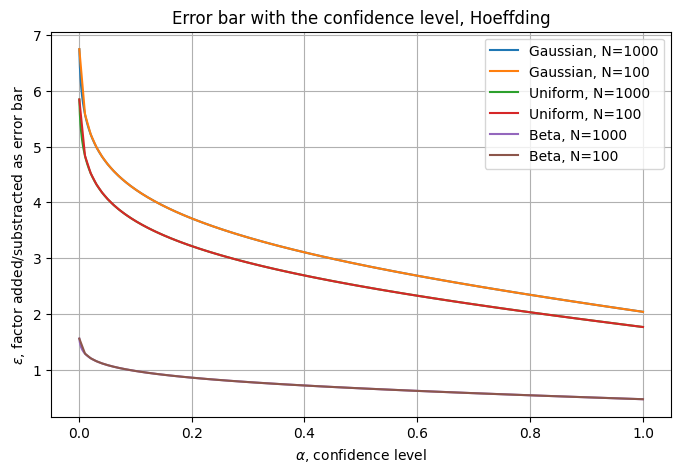

In [214]:
def epsilon(gamma, ab):
   return np.sqrt(np.log(2/gamma) / 2) * ab

gamma_vals1 = np.linspace(0.001, 1, N1)  # gamma from 0.001 to 1
gamma_vals2 = np.linspace(0.001, 1, N2) 
eps_valsN1 = epsilon(gamma_vals1, abN1)
eps_valsN2 = epsilon(gamma_vals2, abN1)
eps_valsU1 = epsilon(gamma_vals1, abU1)
eps_valsU2 = epsilon(gamma_vals2, abU1)
eps_valsB1 = epsilon(gamma_vals1, abB1)
eps_valsB2 = epsilon(gamma_vals2, abB1)

fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(gamma_vals1, eps_valsN1, label='Gaussian, N=1000') 
ax.plot(gamma_vals2, eps_valsN2, label='Gaussian, N=100')
ax.plot(gamma_vals1, eps_valsU1, label='Uniform, N=1000')
ax.plot(gamma_vals2, eps_valsU2, label='Uniform, N=100')
ax.plot(gamma_vals1, eps_valsB1, label='Beta, N=1000')
ax.plot(gamma_vals2, eps_valsB2, label='Beta, N=100')
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel(r"$\alpha$, confidence level") # Add the x axis label
ax.set_ylabel(r"$\epsilon$, factor added/substracted as error bar") # Add the y axis label
ax.set_title('Error bar with the confidence level, Hoeffding'); # Set a title for the whole plot

As explained before, we have considered the same interval $[a_i,b_i]$ for all the random variables of each distribution, making no distinction for the case with $N=1000$ or the case with $N=100$ (both of them are taken as the mininum and maximum value of the cas with 1000 samples, because we consider that the case of 100 that interval will be narrower but just because we do not have all the information, is not a realistic way of bounding that interval).
As a consequence, the error bar given by the Hoeffing inequality is going to be the same for both values of $N$ as we can see in the figure.

We can also see how it's bigger in the gaussian than in the uniform and both bigger than the beta distribution. This can be completely understood if we look back to the figure were we ploted all the data generated together. In the Beta function the values are in a narrower interval.

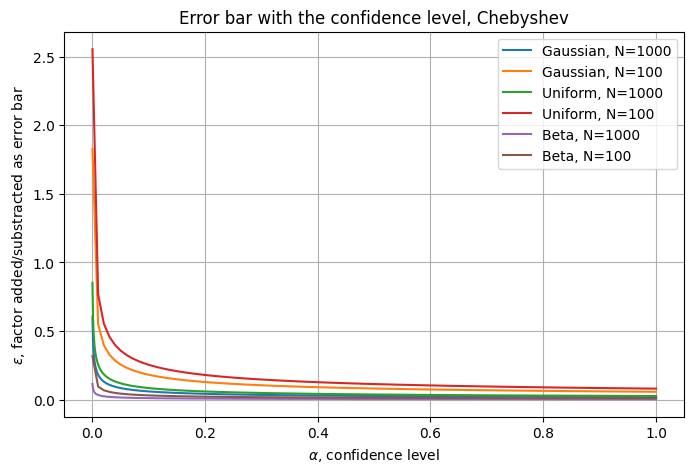

In [206]:
def epsilon(gamma, N,s):
   return s/np.sqrt(N * gamma)

gamma_vals1 = np.linspace(0.001, 1, N1)  # gamma from 0.001 to 1
gamma_vals2 = np.linspace(0.001, 1, N2) 
eps_valsN1 = epsilon(gamma_vals1, N1,sN1)
eps_valsN2 = epsilon(gamma_vals2, N2,sN2)
eps_valsU1 = epsilon(gamma_vals1, N1,sU1)
eps_valsU2 = epsilon(gamma_vals2, N2,sU2)
eps_valsB1 = epsilon(gamma_vals1, N1,sB1)
eps_valsB2 = epsilon(gamma_vals2, N2,sB2)

fig = plt.figure(figsize=(8,5)) # Generate an empty plot with the dimensions specified: (width, height) in inches
ax = fig.add_subplot(1,1,1) # We generate the axes for our plot (nrows, ncols, index)
ax.plot(gamma_vals1, eps_valsN1, label='Gaussian, N=1000') 
ax.plot(gamma_vals2, eps_valsN2, label='Gaussian, N=100')
ax.plot(gamma_vals1, eps_valsU1, label='Uniform, N=1000')
ax.plot(gamma_vals2, eps_valsU2, label='Uniform, N=100')
ax.plot(gamma_vals1, eps_valsB1, label='Beta, N=1000')
ax.plot(gamma_vals2, eps_valsB2, label='Beta, N=100')
ax.grid() # Plot a grid
ax.legend() # Plot a legend
ax.set_xlabel(r"$\alpha$, confidence level") # Add the x axis label
ax.set_ylabel(r"$\epsilon$, factor added/substracted as error bar") # Add the y axis label
ax.set_title('Error bar with the confidence level, Chebyshev'); # Set a title for the whole plot

In this case we get something very similar in all cases, but now there is a difference between the two different size data. That was something expected because in the Chebyshev inequality the expression of $\epsilon$ depends on it. 
The other thing that makes different the values from one distribution from the others is the variance of the data generated, but as we can see that difference becomes less important as the confidence level is increased (as the probability of beeing sure that our interval is going to include the real value decreases)

We can also see that this inequalities gives more accotated limits for the beta distribution. Then, if we compare the others, we get a different resoult depends on the inequalities used.
In the case of Hoeffing, we get a bigger error bar for the gaussian and if we look at the Chebysev it's the uniform the one that has bigger values.
We can explain this if we look at the variance of the data sets:

In [215]:
print(np.std(y_normal1), np.std(y_uniform1), np.std(y_beta1))

0.605903379800549 0.8516971866169782 0.11473130628185223


Then, we see how the Chebyshev inequalities work better (giving a tighter interval) with small values of the variance. In theory it has to be the variance of the underlying distribution (not the one obtained from the data) and it has to be known, but our best estimator is this one.

It's also interesting to mention how the Chebyshev inequalities gives us in almost all cases and for every value of the confidence level a error bar smaller than the given by the Hoeffding. This is something we could expect because when we were introduced to this tools we learnt how the Hoeffding is very useful because it can be almost always applied but as a drawback is not very tight in general.

Doing this plot of the factor $\epsilon$ give us the same information as if we would have ploted the width of the error bar (because as the interval is $[\overline X-\epsilon, \overline X+ \epsilon]$ it's width is exactly $2\epsilon$)

# PROBLEM 2

Now, it's time to compare (if possible) the previous results with theoretical ones. 
Doing so we are double crossing the conclusions given in the previous exercise.

The theoretical results that we are going to consider to check our data is the mean of the underlying distribution. Doing so we'll obtain the actually real value of the mean and we are going to be able to see if it's inside the error bar given previously and if not, with which confidence we can be sure that it's inside certain confidence interval.

For the GAUSSIAN distribution it's very simple, we have that the theoretical mean is going to be the given to generate the data, so $\mu=0$.

For the UNIFORM distribution we have to calculate the mean with the following expression: $\mu=(a+b)/2$, where we considered $a=-1$ and $b=2$, so $\mu=1/2=0.5$.

Last, the BETA distribution. The expression of the mean is given by $\mu=\alpha/(\alpha+\beta)$ and we have generated the data wiht $\alpha=3$ and $\beta=10$, so we get $\mu=3/13\approx0.2308$.

In [207]:
# But, even in the scenario with only 100 samples, the means obtained are quite close to the theoretical means of each distribution:
print("Theoretical means:")
print("    Gaussian: 0")
print("    Uniform: 0.5")   
print("    Beta: 0.2308")
print("Obtained means with N=100:")
print(f"    Gaussian: {round(np.mean(y_normal2),4)}")
print(f"    Uniform: {round(np.mean(y_uniform2),4)}")
print(f"    Beta: {round(np.mean(y_beta2),4)}")
print("As we can see, the means obtained with only 100 samples are quite close to the theoretical means of each distribution.")
print("If we increase the number of samples, the means obtained would be even closer to the theoretical means, according to the Law of Large Numbers.")

Theoretical means:
    Gaussian: 0
    Uniform: 0.5
    Beta: 0.2308
Obtained means with N=100:
    Gaussian: -0.0543
    Uniform: 0.6266
    Beta: 0.2287
As we can see, the means obtained with only 100 samples are quite close to the theoretical means of each distribution.
If we increase the number of samples, the means obtained would be even closer to the theoretical means, according to the Law of Large Numbers.


Then even for the case with only a 68% probability, the error bars given by Hoeffing and Chebyshev inequalities are much more wide than 'needed'.
Maybe with an smaller sample it would have more sense to have this big error bars but in the case with 100 samples, it should be better to find a criteria that provides narrower ones.

But, in theory the methods used provides valids limits (not the ideals but at least we have some bounds to start)

# PROBLEM 3

Lastly, we're going to do something similar as Problem 1 but with other rule, the 68-95-99.7 rule. 
First we'll introduce it and try to see if we can answer the question of if it holds for the three distributions or not. Then, we'll try to aply it to them and see the results obtained, which we can compare with the ones of the Problem 1 (which are already checked via the Problem 2).

This 68-95-99.7 rule is also known as the empirical rule and sometimes abbreviated as $3_{SR}$ or $3\sigma$ is a shorthand used to remember the percentage of values that lie within an interval estimate in a NORMAL distribution of the values within one, two or three standard deviations of the mean, respectively.
As it a rule defined only for gaussian distributions, in principle it should work only with them, not in the other cases studied in this exercise. In fact, this rule is often used as a simple normality test of a given data.

However, as the central limit theorem states, the other ones should follow this rule if the number of elements in our set is very large.

To prove this we can compare the results of this rule with the ones obtained in the Problem 1.

Essentially, this rule tell us the following:
$$Pr(\mu-1\sigma \leq X \leq \mu+1\sigma) \approx 68.27\% $$
$$Pr(\mu-2\sigma \leq X \leq \mu+2\sigma) \approx 95.45\% $$
$$Pr(\mu-3\sigma \leq X \leq \mu+3\sigma) \approx 99.73\% $$

In [208]:
def confidence_emp(mN, sN, mU, sU, mB, sB, k): 
    # Gaussian
    LciN = mN - k*sN # Lower/left confidence interval Normal
    RciN = mN + k*sN # Upper/right confidence interval Normal
    # Uniform
    LciU = mU - k*sU # Lower/left confidence interval Uniform
    RciU = mU + k*sU # Upper/right confidence interval Uniform
    # Beta
    LciB = mB - k*sB # Lower/left confidence interval Beta
    RciB = mB + k*sB # Upper/right confidence interval Beta
    return(LciN, RciN, LciU, RciU, LciB, RciB)

In [209]:
LciN, RciN, LciU, RciU, LciB, RciB = confidence_emp(mN1, sN1, mU1, sU1, mB1, sB1, k=1)
print(f'Considering a confidence level of 68.27% and a data set of {N1} elements, the error bars of the mean given by 68-95-99.7 are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB= confidence_emp(mN2, sN2, mU2, sU2, mB2, sB2, k=1)
print(f'Considering a confidence level of 68.27% and a data set of {N2} elements, the error bars of the mean given by 68-95-99.7 rule are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB = confidence_emp(mN1, sN1, mU1, sU1, mB1, sB1, k=2)
print(f'Considering a confidence level of 95.45% and a data set of {N1} elements, the error bars of the mean given by 68-95-99.7 rule are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB = confidence_emp(mN2, sN2, mU2, sU2, mB2, sB2, k=2)
print(f'Considering a confidence level of 95.45% and a data set of {N2} elements, the error bars of the mean given by 68-95-99.7 rule are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}\n')

LciN, RciN, LciU, RciU, LciB, RciB = confidence_emp(mN1, sN1, mU1, sU1, mB1, sB1, k=3)
print(f'Considering a confidence level of 99.73% and a data set of {N1} elements, the error bars of the mean given by 68-95-99.7 rule are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')
LciN, RciN, LciU, RciU, LciB, RciB = confidence_emp(mN2, sN2, mU2, sU2, mB2, sB2, k=3)
print(f'Considering a confidence level of 99.73% and a data set of {N2} elements, the error bars of the mean given by 68-95-99.7 rule are:')
print(f'    For the GAUSSIAN distribution: Lower/left bound: {round(LciN,4)}, Upper/right bound: {round(RciN,4)}')
print(f'    For the UNIFORM distribution : Lower/left bound: {round(LciU,4)}, Upper/right bound: {round(RciU,4)}')
print(f'    For the BETA distribution    : Lower/left bound: {round(LciB,4)}, Upper/right bound: {round(RciB,4)}')

Considering a confidence level of 68.27% and a data set of 1000 elements, the error bars of the mean given by 68-95-99.7 are:
    For the GAUSSIAN distribution: Lower/left bound: -0.5772, Upper/right bound: 0.6346
    For the UNIFORM distribution : Lower/left bound: -0.3546, Upper/right bound: 1.3488
    For the BETA distribution    : Lower/left bound: 0.1143, Upper/right bound: 0.3438
Considering a confidence level of 68.27% and a data set of 100 elements, the error bars of the mean given by 68-95-99.7 rule are:
    For the GAUSSIAN distribution: Lower/left bound: -0.6321, Upper/right bound: 0.5234
    For the UNIFORM distribution : Lower/left bound: -0.181, Upper/right bound: 1.4341
    For the BETA distribution    : Lower/left bound: 0.1284, Upper/right bound: 0.329

Considering a confidence level of 95.45% and a data set of 1000 elements, the error bars of the mean given by 68-95-99.7 rule are:
    For the GAUSSIAN distribution: Lower/left bound: -1.1831, Upper/right bound: 1.2405


Comparing the results of the three methods used, we get that for all three distributions, the more tight bounds are impossed by the Chebyshev inequality (with the assumption of taking the experimental variance as the real one). And in all cases that interval includes the real value of the underlying distribution used to generate the data, so we can conclude that with at least 100 samples and the assumption done, this is the best method we have for the three cases studied.

Then, and close to Chebishev's is the 68-95-99.7 rule. In fact, we do not see that it works better in the normal distribution than in the others as expected, but maybe the reason is that the other two can be considered 'similars' to the normal in some way (look at the original distributions, the plot of their pdf).

Last we have the Hoeffding method. It gives us the wider error bar by far. It's possible that the bounds of the values of the variable considered (the variables with more extreme values on the big size sample) for the calculation is not good and we could obtain tighter limits with other consideration.